# KEPUTUSAN BISNIS TOKO ONLINE

Tim pemasaran di sebuah toko online besar telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan. Analisis kali ini bertujuan untuk memprioritaskan sebuah hipotesis dari daftar hipotesis yang telah disusun dan menjalankan hipotesis tersebut dengan melakukan A/B testing. Data yang digunakan ada tiga, yang pertama dataset yang memuat daftar hipotesisi beserta skala-skala dalam parameter Reach, Impact, Confidence, dan Effort. Sedangkan dataset kedua berisi data pesanan dan dataset ketiga berisi data kunjungan. Kedua dataset tersebut merupakan hasil dari percobaan A/B testing di bulan Agustus 2019.


## Prioritas Hipotesis
Sebelum melakukan A/B Testing, pertama-tama yang dilakukan ialah memprioritaskan hipotesis yang akan diuji. Untuk melakukannya, yang diperlukan hanya menerapkan framework ICE dan RICE. Dengan kedua framework tersebut, dapat diketahui mana hipotesis yang sangat diprioritaskan.

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# memuat dataset
try:
    hypothesis = pd.read_csv(
        r'C:\Users\Adam\OneDrive\Course\TripleTen\Sprint 8\hypotheses_us.csv', sep=';'
    )
    
except:
    hypothesis = pd.read_csv(
        '/datasets/hypotheses_us.csv', sep=';'
    )

In [3]:
pd.set_option("display.max_colwidth", None)

In [4]:
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


Dataset ini memuat daftar hipotesis dengan total 9 hipotesis dan memuat 4 parameter dari beberapa hipotesis tersebut. Berikut rincian dari dataset di atas:
- Hypotheses — deskripsi singkat tentang hipotesis
- Reach — jangkauan pengguna, dalam skala satu hingga sepuluh
- Impact — dampak terhadap pengguna, dalam skala satu hingga sepuluh
- Confidence — keyakinan pada hipotesis, dalam skala satu sampai sepuluh
- Effort — sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh. Semakin tinggi nilai Effort, semakin intensif sumber daya pengujiannya.

In [5]:
# mengganti semua kolom dengan huruf kecil
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
# membuat kolom untuk identitas hipotesis
hypothesis['hypo_id'] = range(1, len(hypothesis) + 1)

In [7]:
# menerapkan framework ICE
hypothesis['ICE'] = (
    (
        hypothesis['impact'] * hypothesis['confidence']) / hypothesis['effort']
).round(2)

hypothesis[['hypo_id', 'ICE']].sort_values(by='ICE', ascending=False)

,hypo_id,ICE
8,9,16.20
0,1,13.33
7,8,11.20
6,7,8.00
2,3,7.00
1,2,2.00
5,6,1.33
3,4,1.12
4,5,1.00


Setelah menerapkan framework ICE pada dataset, hipotesis 9 yang paling tinggi skor prioritasnya dengan skor 16.2, lalu hipotesis 1 dengan skor 13.33 dan hipotesis 8 dengan skor 11.2. Hal ini membuktikan bahwa hipotesis 9 harus diprioritaskan berdasarkan framework ICE.

In [68]:
# menerapkan framework RICE
hypothesis['RICE'] = (
    (
        hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']
    ) / hypothesis['effort']).round(2)

hypothesis[['hypo_id', 'RICE']].sort_values(by='RICE', ascending=False)

,hypo_id,RICE
7,8,112.0
2,3,56.0
0,1,40.0
6,7,40.0
8,9,16.2
3,4,9.0
1,2,4.0
5,6,4.0
4,5,3.0


Setelah menerapkan framework RICE, rupanya urutan prioritas berubah. Di urutan pertama hipotesis 8 yang paling tinggi skornya dengan skor 112, diikuti hipotesis 3 dengan skor 56, dan hipotesis 1 dengan skor 40.



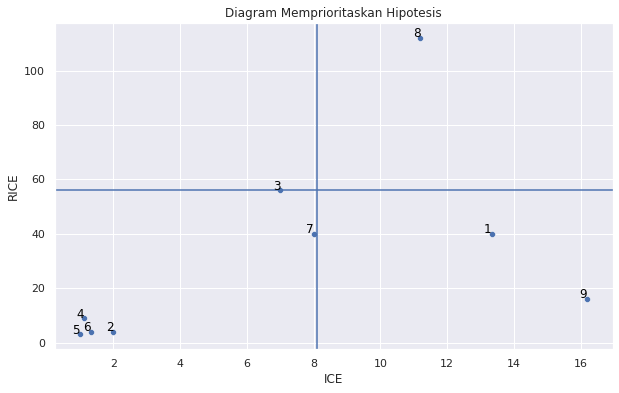

In [69]:
# menunjukkan perubahan prioritas hipotesis saat RICE diterapkan untuk menggantikan ICE.
num_rows = hypothesis['hypo_id'].nunique()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=hypothesis, x='ICE', y='RICE')
plt.title('Diagram Memprioritaskan Hipotesis')
plt.axhline(y=56)
plt.axvline(x=8.1)

for line in range(0, num_rows):
     plt.text(hypothesis.ICE[line], 
              hypothesis.RICE[line]+0.2, 
              hypothesis.hypo_id[line], 
              horizontalalignment='right', 
              size='medium', 
              color='black'
             )
        
plt.show()


Kesimpulan yang dapat ditarik yaitu:
- Dalam framework ICE, hipotesis 9 memiliki skor tinggi karena memiliki dampak dan keyakinan yang tinggi, meskipun jangkauannya mungkin tidak sebesar hipotesis lainnya.
- Dalam framework RICE, hipotesis 8 mendapatkan prioritas tinggi karena memiliki jangkauan yang sangat tinggi (menghasilkan skor tertinggi dalam hal jangkauan), meskipun dampak dan keyakinannya mungkin tidak setinggi hipotesis 9. Hipotesis 1 juga mendapatkan peringkat tinggi karena kombinasi dampak yang layak dan jangkauan yang tinggi.

Hipotesis yang paling diprioritaskan untuk diuji yaitu hipotesis 8.

## Persiapan Dataset

In [9]:
# memuat dataset orders
try:
    orders = pd.read_csv(
        r'C:\Users\Adam\OneDrive\Course\TripleTen\Sprint 8\orders_us.csv').rename(
    columns={
        'transactionId':'orderId',
        'visitorId':'userId'
    }
)
    
except:
    orders = pd.read_csv(
        '/datasets/orders_us.csv').rename(
    columns={
        'transactionId':'orderId',
        'visitorId':'userId'
    }
)
    
# memuat dataset visits
try:
    visits = pd.read_csv(
        r'C:\Users\Adam\OneDrive\Course\TripleTen\Sprint 8\visits_us.csv'
    )
    
except:
    visits = pd.read_csv(
        '/datasets/visits_us.csv',
    )

In [10]:
# menampilkan informasi umum dataset orders dan 10 baris pertama
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   orderId  1197 non-null   int64  
 1   userId   1197 non-null   int64  
 2   date     1197 non-null   object 
 3   revenue  1197 non-null   float64
 4   group    1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


Data orders memuat data pembelian pelanggan. Terdapat 1197 baris dengan 5 kolom dengan rincian sebagai berikut: 
- orderId — ID pesanan
- userId — ID pengguna yang membuat pesanan
- date — tanggal dibuatnya pesanan
- revenue — pendapatan dari pesanan
- group — kelompok uji (test group) A/B tempat pengguna berada

In [11]:
# menampilkan informasi umum dataset visits dan 10 baris pertama
visits.info()
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Dataset visits memuat data kunjungan ke situs web. Dataset ini memuat 62 baris dan 3 kolom dengan rincian sebagai berikut:
- date — tanggal
- group — kelompok uji (test group) A/B
- visits — jumlah kunjungan pada tanggal yang ditentukan untuk kelompok uji A/B yang ditentukan

## Pra-pemrosesan Data
Sebelum melakukan analisis A/B testing, kedua dataset perlu diperiksa terlebih dahulu datanya. Seperti nilai pada kolom, tipe datanya, atau mengganti tipe datanya.

#### Data Orders

In [12]:
# merubah tipe data pada kolom date
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
# melihat nilai di dalam kolom
orders.duplicated().sum()

0

In [14]:
# memeriksa distribusi user pada kedua grup
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [15]:
# memeriksa user id yang terduplikat pada kedua grup
userA = orders[orders['group'] == 'A']['userId'].drop_duplicates()
userB = orders[orders['group'] == 'B']['userId'].drop_duplicates()
duplicate_user = userB[userB.isin(userA)]
len(duplicate_user)

58

In [16]:
# menghapus user id yang terduplikat
orders = orders[~orders['userId'].isin(duplicate_user)]

In [17]:
# memeriksa kembali user id yang terduplikat pada kedua grup
clean_userA = orders[orders['group'] == 'A']['userId'].drop_duplicates()
clean_userB = orders[orders['group'] == 'B']['userId'].drop_duplicates()

clean_user = clean_userB[clean_userB.isin(clean_userA)]

len(clean_user)

0

In [18]:
# memeriksa kembali distribusi user pada kedua grup
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

In [19]:
# memeriksa distribusi nilai kolom revenue
orders[['revenue']].describe()

,revenue
count,1016.000000
mean,130.770866
std,648.079810
min,5.000000
25%,20.775000
50%,50.100000
75%,126.950000
max,19920.400000


In [20]:
# memeriksa duplikasi pada kolom user id
orders['userId'].duplicated().sum()

43

In [21]:
# memeriksa durasi waktu pengujian
orders[['date']].agg({min,max})

,date
min,2019-08-01
max,2019-08-31


In [22]:
# memeriksa duplikasi pada kolom orderId
orders['orderId'].duplicated().sum()

0

In [23]:
# menampilkan kembali informasi umum dan sample data orders
orders.info()
orders.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderId  1016 non-null   int64         
 1   userId   1016 non-null   int64         
 2   date     1016 non-null   datetime64[ns]
 3   revenue  1016 non-null   float64       
 4   group    1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


,orderId,userId,date,revenue,group
872,2000852429,2445531802,2019-08-08,15.7,A
241,1164811175,3524303171,2019-08-02,40.2,B
1132,4209564703,1795951456,2019-08-13,135.2,B
476,457171476,1377447894,2019-08-28,5.6,B
981,702418073,3396460792,2019-08-10,10.8,A
260,364342391,2849720983,2019-08-02,40.2,B
125,2232016803,428219747,2019-08-17,125.9,B
913,4132628207,2604694259,2019-08-08,25.4,B
957,3759988715,1762249948,2019-08-31,80.5,B
1033,1338703051,962484204,2019-08-10,25.7,B


Pada dataset ini telah dilakukan pemeriksaan dan menerapkan beberapa perubahan yaitu: 
- Mengganti tipe data pada kolom date menjadi datetime
- Menghapus userId yang tercampur di antara kedua grup uji
- Waktu pengujian dimulai dari tanggal 1 Agustus 2019
- Setelah proses inspeksi selesai, dataset terbaru hanya berisi 1016 baris.

#### Data Visits

In [24]:
# mengganti tipe data tanggal
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [25]:
# memeriksa duplikasi data
visits.duplicated().sum()

0

In [26]:
# memeriksa rentang waktu pengujian
visits[['date']].agg({min,max})

,date
min,2019-08-01
max,2019-08-31


In [27]:
# memeriksa nilai pada kolom group
visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [28]:
# memeriksa distribusi pada kolom visits
visits[['visits']].describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [29]:
# menampilkann kembali informasi umum dan sample dataset visits
visits.info()
visits.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visits
56,2019-08-26,B,676
29,2019-08-30,A,490
6,2019-08-07,A,644
57,2019-08-27,B,720
45,2019-08-15,B,544
55,2019-08-25,B,679
23,2019-08-24,A,395
16,2019-08-17,A,412
15,2019-08-16,A,361
35,2019-08-05,B,707


Pada dataset ini telah dilakukan pemeriksaan dan menerapkan beberapa perubahan yaitu:

- Mengganti tipe data pada kolom date menjadi datetime
- Waktu pengujian sama seperti pada dataset order yaitu dimulai dari tanggal 1 Agustus 2019

Setelah kedua dataset telah dilakukan inspeksi, saatnya untuk memulai analisis A/B testing.

### Pendapatan Kumulatif Berdasarkan Kelompok

In [30]:
# mengelompokkan tanggal dan grup uji
datesGroups = orders[['date', 'group']].drop_duplicates()

In [31]:
# mengelompokkan data pendapatan
ordersAgg = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'orderId' : pd.Series.nunique,
        'userId' : pd.Series.nunique,
        'revenue' : 'sum'
    }), axis=1).sort_values(by=['date','group'])

ordersAgg.head()

,date,group,orderId,userId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [32]:
# mengelompokkan data kumulatif harian agregat tentang pengunjung
visitsAgg = datesGroups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
        'date':'max',
        'group':'max',
        'visits':'sum'
    }), axis=1).sort_values(by=['date','group'])

visitsAgg.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [33]:
# menggabungkan kedua tabel di atas menjadi satu
dataCumulative = ordersAgg.merge(visitsAgg, left_on=['date','group'], right_on=['date','group'])

dataCumulative.columns = ['date','group','orders','buyers','revenue','visitors']

dataCumulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


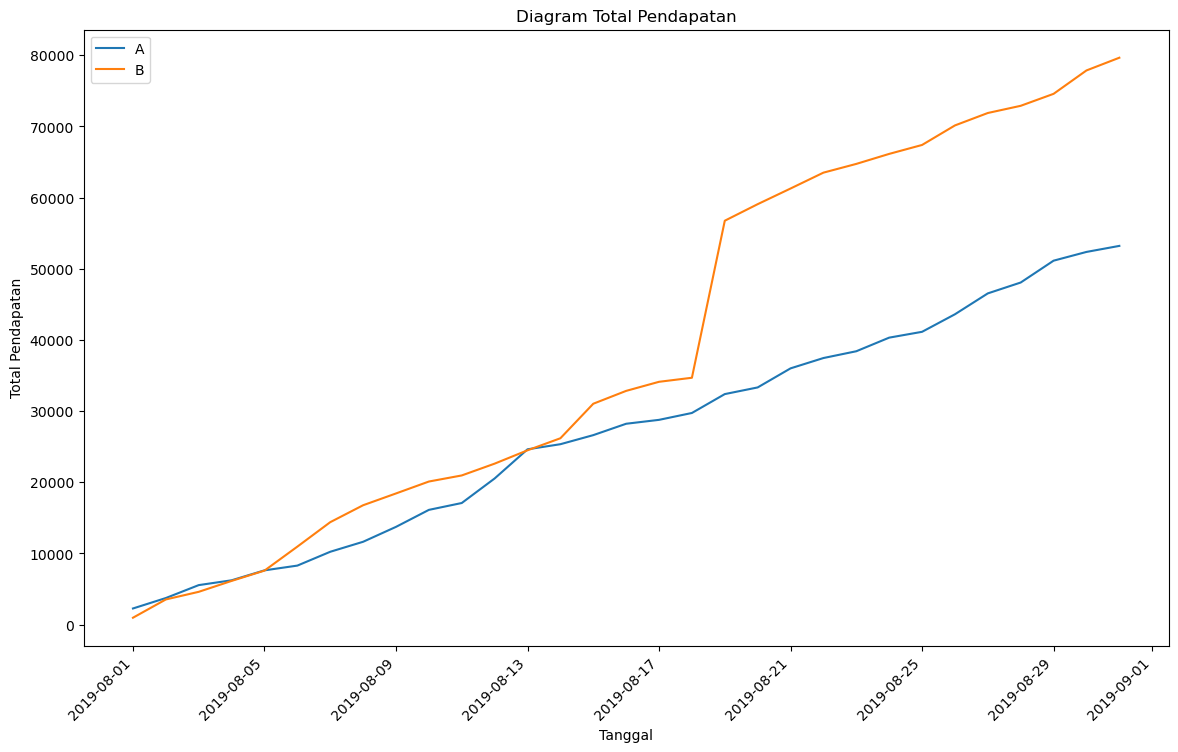

In [34]:
# membuat plot kumulatif pendapatan tiap grup
cumRevA = dataCumulative[dataCumulative['group']=='A'][['date','revenue', 'orders']]
cumRevB = dataCumulative[dataCumulative['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(14, 8))
sns.lineplot(data=cumRevA, x='date', y='revenue', label='A')
sns.lineplot(data=cumRevB, x='date', y='revenue', label='B')
plt.xlabel('Tanggal')
plt.ylabel('Total Pendapatan')
plt.title('Diagram Total Pendapatan')
plt.xticks(rotation=45, ha='right')
plt.legend() 
plt.show()

Setelah diamati grafik di atas, dapat dipastikan bahwa kelompok uji grup B mengalami kenaikan yang signifikan. Akan tetapi, terdapat kejanggalan pada grup B. Hal ini dikarenakan adanya lonjakan yang signifikan pada tanggal 19 Agustus dibanding sebelumnya.

### Rata-rata Pembelian Kumulatif Berdasarkan Kelompok

In [35]:
# menghitung rata-rata pembelian
cumRevA['mean'] = cumRevA['revenue'] / cumRevA['orders']
cumRevB['mean'] = cumRevB['revenue'] / cumRevB['orders']

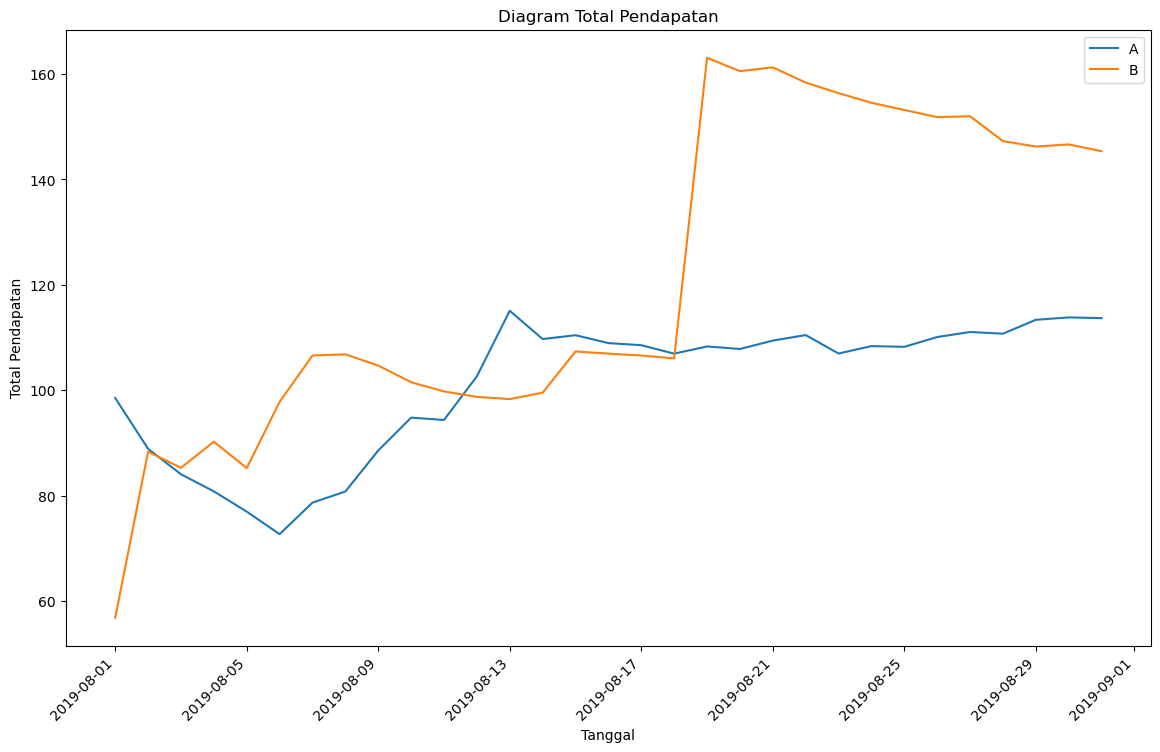

In [36]:
# membuat plot rata-rata pembelian
plt.figure(figsize=(14, 8))
sns.lineplot(data=cumRevA, x='date', y='mean', label='A')
sns.lineplot(data=cumRevB, x='date', y='mean', label='B')
plt.xlabel('Tanggal')
plt.ylabel('Total Pendapatan')
plt.title('Diagram Total Pendapatan')
plt.xticks(rotation=45, ha='right')
plt.legend() 
plt.show()

Sama seperti grafik sebelumnya, kelompok uji grup B mengalami kenaikan secara signifikan selama bulan Agustus dibandingkan dengan kelompok uji grup A. Namun, masih terdapat lonjakan data yang sangat tinggi seperti grafik sebelumnya.

### Perbedaan Relatif Ukuran Rata-rata Pesanan 

In [98]:
# menggabungkan data menjadi satu dataframe
mergeCumRev = cumRevA.merge(
    cumRevB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
mergeCumRev.head()

,date,revenueA,ordersA,meanA,revenueB,ordersB,meanB
0,2019-08-01,2266.6,23,98.547826,967.2,17,56.894118
1,2019-08-02,3734.9,42,88.926190,3535.3,40,88.382500
2,2019-08-03,5550.1,66,84.092424,4606.9,54,85.312963
3,2019-08-04,6225.6,77,80.851948,6138.5,68,90.272059
4,2019-08-05,7623.6,99,77.006061,7587.8,89,85.256180


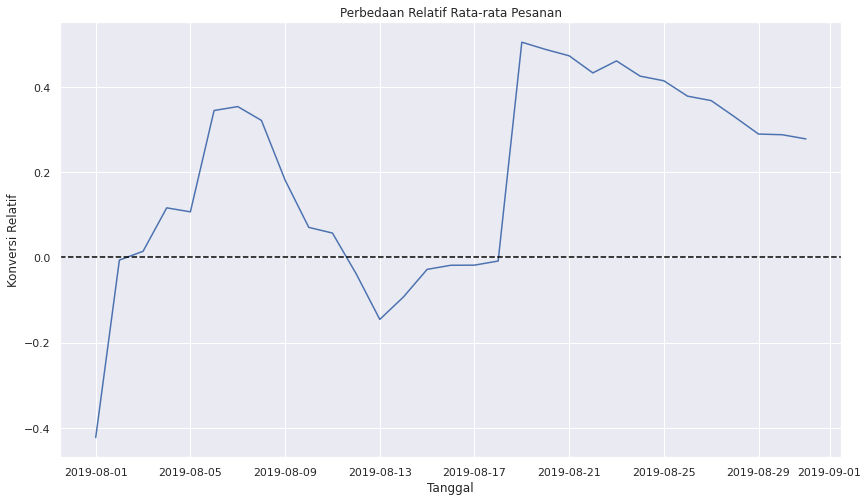

In [99]:
# membuat grafik perbedaan relatif  
plt.figure(figsize=(14, 8))
plt.plot(mergeCumRev['date'], (
    mergeCumRev['revenueB']/mergeCumRev['ordersB']
    )/(
    mergeCumRev['revenueA']/mergeCumRev['ordersA']
    )-1)
plt.xlabel('Tanggal')
plt.ylabel('Konversi Relatif')
plt.title('Perbedaan Relatif Rata-rata Pesanan')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Sama seperti grafik sebelumnya, tingkat konversi grup B meningkat secara signifikan dan juga lonjakan tajam pada tanggal 19 Agustus. Sepertinya terdapat pencilan pada data.

### Konversi Kumulatif Berdasarkan Kelompok

In [100]:
# menghitung konversi kumulatif berdasarkan kelompok
dataCumulative['conversion'] = (dataCumulative['orders']/dataCumulative['visitors'])
cumDataA = dataCumulative[dataCumulative['group']=='A']
cumDataB = dataCumulative[dataCumulative['group']=='B']

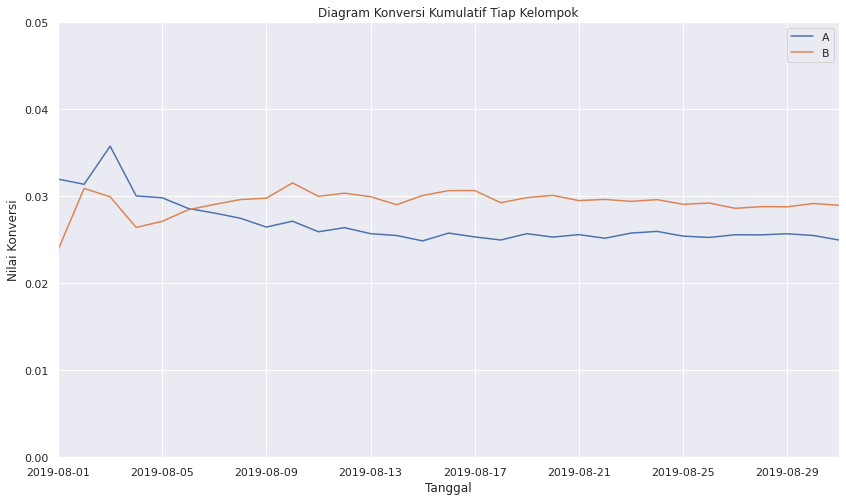

In [101]:
# membuat grafik konversi kumulatif
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")
sns.lineplot(data=cumDataA, x='date', y='conversion', label='A')
sns.lineplot(data=cumDataB, x='date', y='conversion', label='B')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Konversi')
plt.title('Diagram Konversi Kumulatif Tiap Kelompok')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])
plt.show()

Plot diagram di atas terlihat simetris. Hal ini dapat terjadi karena adanya bug atau data yang tersedia tidak dapat dipercaya. Hal tersebut didukung dengan adanya lonjakan yang tajam pada tanggal 19 Agustus. Untuk mengatasi data dapat dipercaya atau tidak, perlu dilakukan uji statistik.

### Perbedaan Relatif Tingkat Konversi Kumulatif Berdasarkan Kelompok

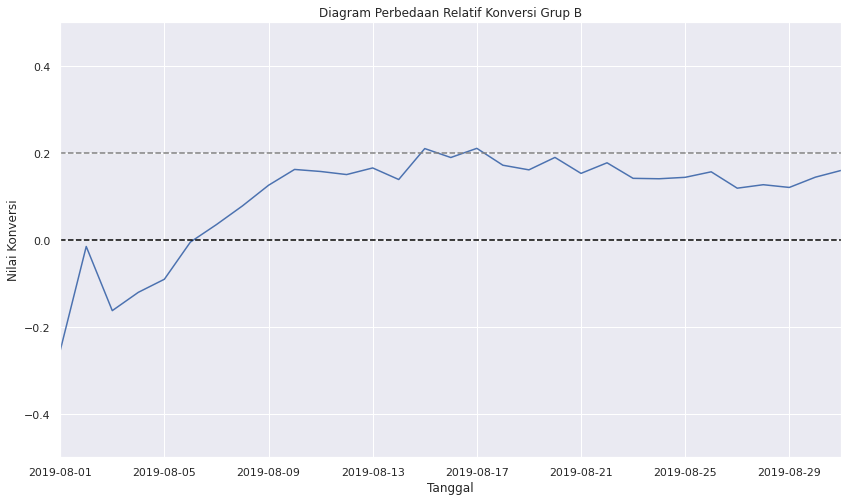

In [102]:
mergCumConv = cumDataA[['date','conversion']].merge(
    cumDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 8))
plt.plot(
    mergCumConv['date'],
    mergCumConv['conversionB']/mergCumConv['conversionA']-1
)
plt.xlabel('Tanggal')
plt.ylabel('Nilai Konversi')
plt.title('Diagram Perbedaan Relatif Konversi Grup B')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])
plt.show()

Pada grafik di atas dapat disimpulkan bahwa kelompok uji grup B awalnya sangat rendah. Namun, pada hari berikutnya dan seterusnya kelompok ini meningkat secara signifikan. Meski begitu, grafik di atas dinilai tidak stabil dikarenakan plot yang mengalami kenaikan dan penurunan berulang. Hal ini menunjukkan bahwa terdapat anomali pada data.

### Pesanan Tiap Pengguna
Setelah diketahui adanya anomali pada data, saatnya untuk melihat metrik-metrik yang menjadikan data tidak dapat dipercaya.

In [103]:
# menghitung jumlah pesanan tiap hari berdasarkan kelompok
ordersUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId' : pd.Series.nunique})
)

ordersUsers.columns = ['userId','orders']  
ordersUsers.sort_values(by='orders', ascending=False).head()

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


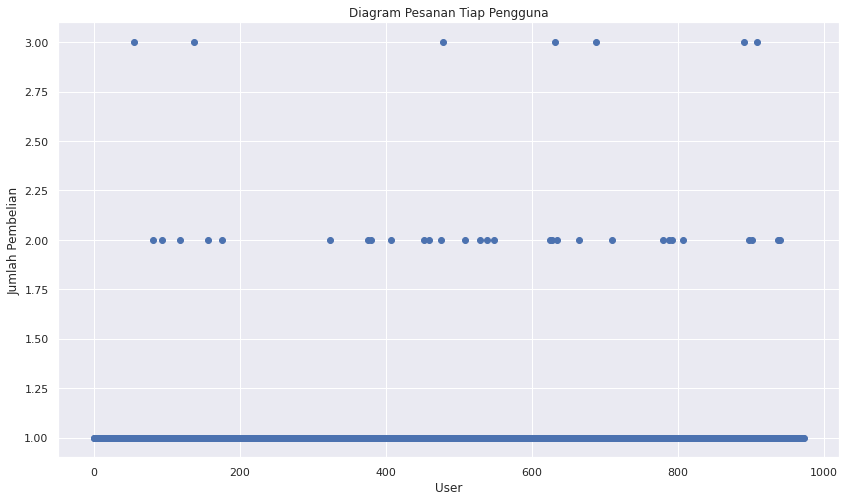

In [104]:
# membuat grafik jumlah pesanan tiap pengguna
x_values = pd.Series(range(0,len(ordersUsers)))

plt.figure(figsize=(14, 8))
plt.scatter(x_values, ordersUsers['orders']) 
plt.xlabel('User')
plt.ylabel('Jumlah Pembelian')
plt.title('Diagram Pesanan Tiap Pengguna')
plt.show()

Bisa dilihat pada grafik di atas bahwa sebagian besar user melakukan pembelian sebanyak 1 kali. Namun ada beberapa user yang melakukan pembelian sebanyak 2 sampai 3 kali. Hal ini menunjukkan adanya pencilan pada data.

### Anomali Data Jumlah Pesanan 
Sekarang saatnya untuk menghitung batas signifikansi data jumlah pesanan. Hal ini dapat dicari dengan menggunakan persentil ke-95 dan ke-99.

In [105]:
# menghitung batas signifikansi
np.percentile(ordersUsers['orders'], [95, 99])

array([1., 2.])

Seperti yang telah diduga, batas signifikansi 95% dan 99% berturut-turut yaitu pengguna yang melakukan 1 kali pembelian dan 2 kali pembelian.

### Distribusi Harga Pesanan
Setelah melihat jumlah pesanan, sekarang saatnya untuk mengamati data jumlah pendapatan tiap pengguna.

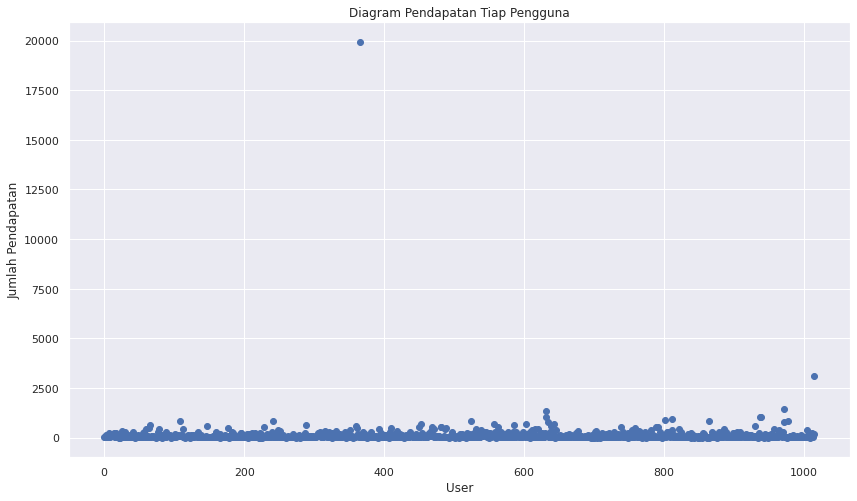

In [106]:
# membuat grafik jumlah pendapatan tiap pengguna
xRev = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(14, 8))
plt.scatter(xRev, orders['revenue']) 
plt.xlabel('User')
plt.ylabel('Jumlah Pendapatan')
plt.title('Diagram Pendapatan Tiap Pengguna')
plt.show()

Hal yang menjadi pusat perhatian yaitu pendapatan pesanan seorang pengguna dengan jumlah sekitar USD 20000. Namun sebagian besar pengguna melakukan pembelian dibawah USD 2000.

### Anomali Data Jumlah Pendapatan
Sekarang saatnya untuk menghitung batas signifikansi data pendapatan tiap pengguna.

In [107]:
# menghitung batas signifikansi
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

Rupanya, batas signifikansi 95% yaitu sekitar USD 414 dan 99% sekitar USD 830. Setelah didapat kedua nilai batas signifikansi pada data jumlah pesanan dan jumlah pendapatan, maka data sebelumnya dapat difilter dengan batas signifikansi yang barus saja dihitung.

### Uji Signifikansi Statistik Konversi Tiap Kelompok
Sebelum memfilter data, sebaikanya dilakukan langkah pengujian terhadap data yang belum difilter. Pengujian yang dilakukan yaitu pengujian Mann-Whitney. Pengujian ini bertujuan untuk menguji apakah data yang dilakukan uji terdapat perbedaan yang signifikan dari data sebelumnya.

In [108]:
# mengelompokkan data pesanan tiap kelompok
orderUserA = orders[orders['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
orderUserA.columns = ['userId', 'orders']

orderUserB = orders[orders['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
orderUserB.columns = ['userId', 'orders'] 

In [109]:
# mengelompokkan data pesanan tiap kelompok
sampleA = pd.concat([orderUserA['orders'],
                     pd.Series(0, index=np.arange(
                         visits[visits['group']=='A']['visits'].sum() - len(orderUserA['orders'])
                     ), name='orders')],axis=0)

sampleB = pd.concat([orderUserB['orders'],
                     pd.Series(0, index=np.arange(
                         visits[visits['group']=='B']['visits'].sum() - len(orderUserB['orders'])
                     ), name='orders')],axis=0)

Sebelum melakukan uji, alpha ditentukan menjadi 5%. Dengan rincian hipotesis:
- Hipotesis 0 : Tidak terdapat perbedaan yang signifikan
- Hipotesis Alternatif : Terdapat perbedaan yang signifikan

In [110]:
# menguji hipotesis mann-whitney
alpha = 0.05
resultConvers = st.mannwhitneyu(sampleA, sampleB)
print('p-value: ', resultConvers.pvalue.round(3))

if (resultConvers.pvalue < alpha):
    print("Hipotesis nol ditolak: Terdapat perbedaan statistik yang siginifikan")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan statistik")
    
print('Konversi relatif untuk grup B: ','{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value:  0.011
Hipotesis nol ditolak: Terdapat perbedaan statistik yang siginifikan
Konversi relatif untuk grup B:  0.160


Hasil dari pengujian di atas menunjukkan bahwa terdapat perbedaan statistik yang signifikan, oleh karena itu hipotesis nol ditolak.

### Uji Signifikansi Statistik Ukuran Pesanan Tiap Kelompok
Sekarang saatnya untuk menguji ukuran pesanan.

In [111]:
# menguji hipotesis mann_whitney
resultOrders = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-value: ', resultOrders.pvalue.round(3))

if (resultOrders.pvalue < alpha):
    print("Hipotesis nol ditolak: Terdapat perbedaan statistik yang siginifikan")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan statistik")
    
print('Pesanan relatif untuk grup B: ','{0:.3f}'
      .format(orders[orders['group']=='B']['revenue']
              .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:  0.862
Hipotesis nol diterima: Tidak terdapat perbedaan statistik
Pesanan relatif untuk grup B:  0.278


Berbeda dengan pengujian sebelumnya, hasil pengujian terhadap pendapatan tiap kelompok tidak terdapat perbedaan secara statistik, oleh karena itu hipotesis nol diterima. 

### Uji Signifikansi Statistik Konversi Tiap Kelompok Data Terfilter
Setelah melakukan uji pada data yang belum difilter, sekarang waktunya untuk melakukan pengujian pada data yang telah difilter dari pencilan.

In [112]:
# mengelompokkan pengguna yang melakukan pembelian lebih dari 1
usersWithManyOrders = pd.concat(
    [
        orderUserA[orderUserA['orders'] > 1]['userId'],
        orderUserB[orderUserB['orders'] > 1]['userId'],
    ],
    axis=0,
)
len(usersWithManyOrders)

36

In [113]:
# mengelompokkan pengguna yang melakukan pembelian dengan harga lebih dari 414
usersWithExpensiveOrders = orders[orders['revenue'] > 414]['userId']
len(usersWithExpensiveOrders)

51

In [114]:
# menggabungkan data-data pengguna yang abnormal
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
len(abnormalUsers)

86

Rupanya ada 86 pengguna yang tidak normal atau bisa dibilang sebagai outlier data yang menyebabkan data tidak dapat dipercaya. Sekarang waktunya untuk memfilter datanya.

In [115]:
# memfilter data dari data abnormal
sampleAFinal = pd.concat(
    [
        orderUserA[np.logical_not(orderUserA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orderUserA['orders'])),
                  name='orders')
    ],axis=0)

sampleBFinal = pd.concat(
    [
        orderUserB[np.logical_not(orderUserB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orderUserB['orders'])),
                  name='orders')
    ],axis=0) 


In [116]:
# melakukan pengujian mann-whitney
resultFinalConvers = st.mannwhitneyu(sampleAFinal, sampleBFinal)
print('p-value: ', resultFinalConvers.pvalue.round(3))

if (resultFinalConvers.pvalue < alpha):
    print("Hipotesis nol ditolak: Terdapat perbedaan statistik yang siginifikan")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan statistik")
    
print('Konversi relatif untuk grup B: ','{0:.3f}'.format(sampleBFinal.mean() / sampleAFinal.mean() - 1))

p-value:  0.016
Hipotesis nol ditolak: Terdapat perbedaan statistik yang siginifikan
Konversi relatif untuk grup B:  0.174


Setelah dilakukan pengujian pada data terbaru, hasilnya menunjukkan bahwa terdapat perbedaan statistik yang signifikan pada kelompok uji grup B sehingga hipotesis nol ditolak.

### Uji Signifikansi Statistik Ukuran Pesanan Data Terfilter
Sekarang saatnya untuk melakukan pengujian terakhir yaitu pengujian terhadap pendapatan tiap pengguna yang telah difilter.

In [117]:
# mengelompokkan data pembelian terbaru
final_orderA = orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue']
final_orderB = orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue']

In [118]:
# pengujian mann-whitney pada data terbaru
resultFinalOrders = st.mannwhitneyu(final_orderA, final_orderB)
print('p-value: ', resultFinalOrders.pvalue.round(3))

if (resultFinalOrders.pvalue < alpha):
    print("Hipotesis nol ditolak: Terdapat perbedaan statistik yang siginifikan")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan statistik")
    
print('Pesanan relatif untuk grup B: ','{0:.3f}'
      .format(final_orderB.mean()/final_orderA.mean()-1))

p-value:  0.771
Hipotesis nol diterima: Tidak terdapat perbedaan statistik
Pesanan relatif untuk grup B:  -0.033


Hasilnya menunjukkan bahwa tidak terdapat perbedaan statistik sehingga hipotesis nol diterima. Ukuran relatifnya pun turun 3% dari 26%.

## Kesimpulan Umum
Kesimpulan dari analisis A/B Testing yang telah dilakukan yaitu:
- Dalam hal konversi, terdapat perbedaan statistik yang signifikan antara kelompok uji grup A dan B. Konversi relatif untuk grup B adalah 16% lebih tinggi daripada grup A setelah memfilter data pencilan.
- Namun, dalam hal ukuran pesanan rata-rata atau pendapatan, tidak terdapat perbedaan statistik yang signifikan antara kedua kelompok setelah memfilter data pencilan. Ukuran relatifnya turun 3% dari 26% setelah memfilter data.
- Ukuran pesanan rata-rata tidak menunjukkan perbedaan statistik yang signifikan setelah memfilter data.
- Terdapat perbedaan statistik yang signifikan dalam konversi antara kedua kelompok, tetapi tidak ada perbedaan statistik dalam ukuran pesanan rata-rata.
- melanjutkan pengujian untuk mengumpulkan lebih banyak data dan memahami lebih lanjut tentang perubahan yang terjadi pada kelompok B pada tanggal 19 Agustus.


## Rekomendasi Bisnis
Maka keputusan bisnis yang diambil yaitu: 

Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin. Hal ini didasari oleh:
- Analisis menunjukkan bahwa tidak ada perbedaan statistik yang signifikan antara kedua kelompok dalam hal ukuran pesanan rata-rata, yang merupakan salah satu faktor yang memengaruhi pendapatan.
- Namun, dalam hal konversi, terdapat perbedaan statistik yang signifikan antara kedua kelompok, dengan konversi relatif untuk grup B sekitar 16% lebih tinggi setelah memfilter data pencilan.
- Meningkatkan konversi dapat berdampak positif pada pendapatan, dan oleh karena itu perlu untuk mengadopsi strategi atau fitur yang telah diuji dalam kelompok B untuk diterapkan secara lebih luas.

Adapun rekomendasi yang dapat dilakukan yaitu:
- Fokus utama sebaiknya diarahkan pada peningkatan konversi. Karena peningkatan konversi secara langsung berpotensi meningkatkan pendapatan meskipun ukuran pesanan rata-rata tidak berubah.
- Implementasikan fitur atau strategi yang diterapkan pada grup B ke dalam operasional secara lebih luas untuk memaksimalkan potensi peningkatan konversi.
- Melakukan pemantauan secara berkelanjutan terhadap performa konversi dan faktor-faktor pendukung, terutama mengamati kejadian atau perubahan yang terjadi pada tanggal 19 Agustus.
- Mengumpulkan data tambahan untuk memastikan bahwa peningkatan konversi di grup B konsisten dalam jangka panjang dan tidak dipengaruhi oleh faktor sementara atau eksternal.
- Menggunakan insight dari pengujian ini untuk mengoptimalkan kampanye pemasaran, misalnya dengan menyesuaikan pesan, penawaran, atau fitur-fitur yang telah terbukti meningkatkan konversi.

Dengan langkah-langkah tersebut, perusahaan dapat memanfaatkan keunggulan strategi grup B untuk mendorong pertumbuhan pendapatan melalui peningkatan konversi, sembari terus memantau dan menyesuaikan strategi berdasarkan data terbaru.